# Customer Churn
"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service.Consequently, there's growing interest among companies to develop better churn-detection techniques, leading many to look to data mining and machine learning for new and creative approaches. This is a post about modeling customer churn using Python.

# The DataSet¶
The data set I'll be using is a longstanding telecom customer data set..

The data is straightforward. Each row represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

In [48]:
import pandas as pd
churn_df = pd.read_csv('churn.csv.txt')

In [49]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [50]:
#From Sklearn library importing labelEncoder to convert categorical string columns into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_df['VMail Plan'] = le.fit_transform(churn_df['VMail Plan'].astype('str'))


In [51]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [52]:
churn_df['Churn?'] = le.fit_transform(churn_df['Churn?'].astype('str'))

In [53]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [54]:
churn_df['Int\'l Plan'] = le.fit_transform(churn_df['Int\'l Plan'].astype('str'))

In [55]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [10]:
churn_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [32]:
#df1 = churn_df.rename(columns={['Int\'l Plan': intl]})
                             

SyntaxError: invalid syntax (<ipython-input-32-b101fc95fe14>, line 1)

In [13]:
#churn_df1=pd.get_dummies(churn_df['Int\'l Plan'])

In [15]:
#churn_df_new=pd.concat([churn_df1,churn_df],axis=1)
#churn_df_new.head()  

,no,yes,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,1,0,KS,128,415,382-4657,no,1,25,265.1,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,0,OH,107,415,371-7191,no,1,26,161.6,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,1,0,NJ,137,415,358-1921,no,0,0,243.4,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,1,OH,84,408,375-9999,yes,0,0,299.4,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,1,OK,75,415,330-6626,yes,0,0,166.7,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [57]:
col = ['State','Area Code','Int\'l Plan','Phone']
churn_df = churn_df.drop(col,axis=1)
churn_df.head()

,Account Length,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [58]:
churn_df.dtypes

Account Length      int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?              int64
dtype: object

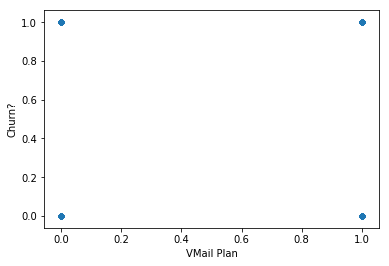

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
churn_df.plot(x = 'VMail Plan',y='Churn?', kind='scatter')

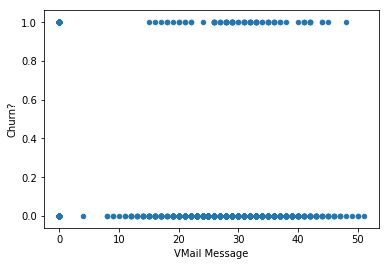

In [66]:
churn_df.plot(x = 'VMail Message',y='Churn?', kind='scatter')

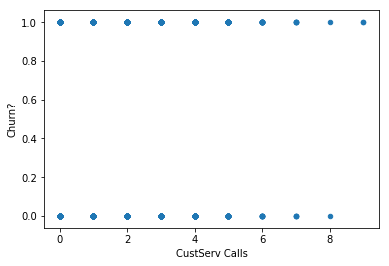

In [67]:
churn_df.plot(x = 'CustServ Calls',y='Churn?', kind='scatter')

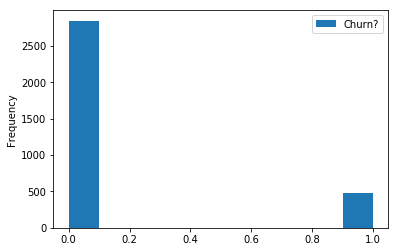

In [68]:
churn_df.plot(x = 'CustServ Calls',y='Churn?', kind='hist')

# Train-Test split using sklearn library
To split the given DataSet into Training Data and Test Data and import different models of Machine Learning from sklearn library.

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
#Assigning target variable into Y
X=churn_df.iloc[:,0:15] 
Y=churn_df[['Churn?']]
X.head()

,Account Length,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge
0,128,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,107,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,84,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,75,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [73]:
X_train.shape

(2499, 15)

In [74]:
X_train.tail()

,Account Length,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge
1645,95,1,36,283.1,112,48.13,286.2,86,24.33,261.7,129,11.78,11.3,3,3.05
1070,75,0,0,143.2,92,24.34,209.1,142,17.77,173.0,96,7.79,11.9,9,3.21
1251,87,0,0,169.1,105,28.75,169.9,102,14.44,244.9,106,11.02,9.9,10,2.67
2775,120,1,24,227.5,81,38.68,234.9,71,19.97,166.4,128,7.49,9.0,13,2.43
3040,90,0,0,145.6,103,24.75,197.1,137,16.75,294.5,83,13.25,10.5,4,2.84


In [75]:
Y_train.head()

,Churn?
2028,1
1106,0
459,0
1608,0
2348,0


In [46]:
type(Y_train)

pandas.core.frame.DataFrame

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [77]:
knn.fit(X_train, Y_train)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
knn.score(X_test, Y_test)

0.8764988009592326

In [82]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

# Now measure its performance with the test data
clf.score(X_test, Y_test)   

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8465227817745803